# **Mount implementation folder in google drive**

In [26]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [27]:
%cd /content/drive/MyDrive/FYP/Implementation/models
! ls

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/models
ann_backdoors.pkl  best_logr.pkl	   knn_worms.pkl
ann_dos.pkl	   ens_logr.pkl		   RandomForrest_Analysis.pkl
ann_shellcode.pkl  knn_exploits.pkl	   RandomForrest_Fuzzer.pkl
bagging_lr.pkl	   knn_generic.pkl
bagging_svr.pkl    knn_reconnaissance.pkl


# **Load attackwise best ML models**

In [28]:
from joblib import Parallel, delayed
import joblib

%cd /content/drive/MyDrive/FYP/Implementation/models

ann_backdoors = joblib.load('ann_backdoors.pkl')
ann_dos = joblib.load('ann_dos.pkl')
ann_shellcode = joblib.load('ann_shellcode.pkl')
knn_exploits = joblib.load('knn_exploits.pkl')
knn_generic = joblib.load('knn_generic.pkl')
knn_reconnaissance = joblib.load('knn_reconnaissance.pkl')
knn_worms = joblib.load('knn_worms.pkl')
RandomForrest_Analysis = joblib.load('RandomForrest_Analysis.pkl')
RandomForrest_Fuzzer = joblib.load('RandomForrest_Fuzzer.pkl')

models = [RandomForrest_Analysis, ann_backdoors, ann_dos, knn_exploits, RandomForrest_Fuzzer, knn_generic, knn_reconnaissance, ann_shellcode, knn_worms]

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/models


In [29]:
%cd ../data
! ls

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data
encoded-data.csv	 preprosessing-dos.csv	       UNSW-NB15_1.csv
high_level_features.csv  selected_columns_all.csv      UNSW-NB15_2.csv
NUSW-NB15_features.csv	 SVR-predict-data.csv	       UNSW-NB15_3.csv
OTset.csv		 test_high_level_features.csv  UNSW-NB15_4.csv
preprocessing.csv	 testset.csv


## **Load training dataset**

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

attack_types = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms']
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']

#get selected columns for training
%cd /content/drive/MyDrive/FYP/Implementation/data
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)

columns = set(['Label'])
for attack_type in attack_types:
  tmp = set(select_col[attack_type])
  columns = columns.union(tmp)

#create training dataset 
df = pd.read_csv('encoded-data.csv', sep=',', on_bad_lines='skip', index_col=False)
df = df[columns]
df

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data


,ct_state_ttl,ct_dst_sport_ltm,ackdat,proto,srcip,ct_src_ ltm,Label,dttl,ct_dst_ltm,swin,...,sbytes,state,smeansz,Sload,Spkts,dbytes,ct_srv_src,dsport,sttl,dstip
0,0,1,0.000000,120,34,1,0,29,7,0,...,146,2,73,5.362718e+05,2,178,4,83,31,20
1,0,2,0.000000,120,36,4,0,29,3,0,...,146,2,73,5.637066e+05,2,178,2,83,31,23
2,0,1,0.000131,114,41,8,0,29,3,255,...,24344,5,106,1.961003e+05,230,29348,1,34,31,27
3,0,18,0.000000,120,10,18,0,0,18,0,...,264,6,132,3.520000e+08,2,0,35,83,60,28
4,0,1,0.000137,114,34,3,0,29,3,255,...,1064,5,89,1.947618e+06,12,2260,12,20880,31,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524019,0,23,0.000000,120,14,23,0,0,23,0,...,264,6,132,1.173333e+08,2,0,23,83,60,29
1524020,0,1,0.000176,114,34,1,0,29,3,255,...,2054,5,93,3.680961e+04,22,2478,6,20880,31,8
1524021,1,1,0.066741,114,31,1,1,252,1,255,...,1058,5,88,1.161870e+04,12,766,2,1093,254,19
1524022,0,1,0.000256,114,41,2,0,29,4,255,...,3302,5,61,6.206434e+05,54,37162,6,144648,31,8


# **create Test set**

In [ ]:
import pandas as pd
import numpy as np

%cd /content/drive/MyDrive/FYP/Implementation/data
test_data =pd.read_csv("testset.csv", sep=',', on_bad_lines='skip', index_col=False)
test_data = test_data[columns]


test_data = test_data.replace('-','')
test_data = test_data.replace(r'^\s*$', np.nan, regex=True)

#delete raws with missing values
for i in test_data.columns.values.tolist():
  i = test_data.loc[test_data[i].isnull()].index
  test_data = test_data.drop(index=list(i))


#encode the data
from sklearn.preprocessing import LabelEncoder

# replace hex with int
if 'sport' in test_data:
    test_data['sport'] = test_data['sport'].astype(str).apply(int, base=16)
if 'dsport' in test_data:
    test_data['dsport'] = test_data['dsport'].astype(str).apply(int, base=16)

# #Create an instance of Label-encoder
labelencoder = LabelEncoder() 

# # encode columns consists with strings
if 'srcip' in test_data:
    test_data['srcip'] = labelencoder.fit_transform(test_data['srcip'])
if 'dstip' in test_data:
    test_data['dstip'] = labelencoder.fit_transform(test_data['dstip'])
if 'proto' in test_data:
    test_data['proto'] = labelencoder.fit_transform(test_data['proto'])
if 'state' in test_data:
    test_data['state'] = labelencoder.fit_transform(test_data['state'])

metrics = []
for attack_type in attack_types:
  feature_name = f'{attack_type}_metric'
  metrics.append(feature_name)

i = 0
test_high_level_features = pd.DataFrame()

for model in models:
  columns = select_col[attack_types[i]]
  input = test_data
  data = input[columns].values
  try:
    if i in [1, 2, 7]:
      y_predict_all = model.predict_proba(data)
      y_predict = y_predict_all[:, 1]
    else:
      y_predict = model.predict(data)
    test_high_level_features[metrics[i]] = y_predict
  except Exception as e:
    print(f'{attack_types[i]}, i: {i}, error: {e}\n')
  i = i + 1

test_high_level_features['Label'] = test_data['Label']
test_high_level_features.to_csv("test_high_level_features.csv", header=True, index=False)
test_high_level_features

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## **Create High level features**

In [ ]:
import numpy as np
metrics = []
for attack_type in attack_types:
  feature_name = f'{attack_type}_metric'
  metrics.append(feature_name)

i = 0
high_level_features = pd.DataFrame()
for model in models:

  columns = select_col[attack_types[i]]
  input = df
  data = input[columns]
  try:
    if i in [1, 2, 7]:
      data = np.array(data)
      y_predict_all = model.predict_proba(data)
      y_predict = y_predict_all[:, 1]
    else:
      y_predict = model.predict(data)
    high_level_features[metrics[i]] = y_predict
  except Exception as e:
    print(f'{attack_types[i]}, i: {i}, error: {e}\n')
  i = i + 1
high_level_features
high_level_features.to_csv("high_level_features.csv", header=True, index=False)

In [32]:
%cd /content/drive/MyDrive/FYP/Implementation/data
high_level_features=pd.read_csv("high_level_features.csv", sep=',', on_bad_lines='skip', index_col=False)
high_level_features['Label'] = df['Label']
high_level_features
high_level_features.to_csv("high_level_features.csv", header=True, index=False)

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data


##**Logistic Regression**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import joblib

%cd /content/drive/MyDrive/FYP/Implementation/data
high_level_features=pd.read_csv("high_level_features.csv", sep=',', on_bad_lines='skip', index_col=False)
x= np.array(high_level_features)
y = np.array(df['Label'])
print(x.shape,y.shape)
logr = linear_model.LogisticRegression(random_state=0)
logr.fit(x, y)

# Save the model as a pickle in a file
%cd /content/drive/MyDrive/FYP/Implementation/models
joblib.dump(logr, 'ens_logr.pkl')


## **Computing optimal threshold**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import joblib

%cd /content/drive/MyDrive/FYP/Implementation/models
# Load the model from the file
logr = joblib.load('ens_logr.pkl')

#getting probabilities of class 1
prob=logr.predict_proba(x)
prob=prob[:,1]

optimal_threshold = 0
maximum_f1 = 0

for i in range(1,100):
  threshold = i/100
  y_predict_class_train = [1 if p > threshold else 0 for p in prob]
  f1 = f1_score(y, y_predict_class_train)
  if maximum_f1 < f1:
    maximum_f1 = f1
    optimal_threshold = threshold
    opt_y_train = y_predict_class_train 

accuracy = accuracy_score(y, opt_y_train)
print(f"maximum_train_f1_score: {maximum_f1}, accuracy: {accuracy}, optimal_threshold: {optimal_threshold: .6f}")
confusion_matrix = metrics.confusion_matrix(y, opt_y_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# **Test Set Results**

/content/drive/MyDrive/FYP/Implementation/data
/content/drive/MyDrive/FYP/Implementation/models
maximum_train_f1_score: 0.9476985407210113, accuracy: 0.9862777751531472, optimal_threshold:  0.310000


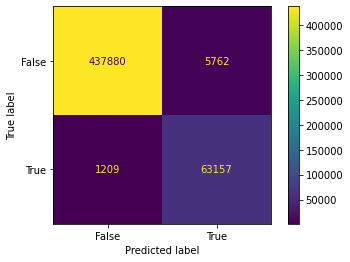

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import joblib


%cd /content/drive/MyDrive/FYP/Implementation/data
test_high_level_features=pd.read_csv("test_high_level_features.csv", sep=',', on_bad_lines='skip', index_col=False)
x_test= np.array(test_high_level_features)
y_test = np.array(test_data['Label'])

%cd /content/drive/MyDrive/FYP/Implementation/models
# Load the model from the file
logr = joblib.load('ens_logr.pkl')

#getting probabilities of class 1
prob=logr.predict_proba(x_test)
prob=prob[:,1]

optimal_threshold = 0
maximum_f1 = 0

for i in range(1,100):
  threshold = i/100
  y_predict_class_train = [1 if p > threshold else 0 for p in prob]
  f1 = f1_score(y_test, y_predict_class_train)
  if maximum_f1 < f1:
    maximum_f1 = f1
    optimal_threshold = threshold
    opt_y_train = y_predict_class_train 

accuracy = accuracy_score(y_test, opt_y_train)
print(f"maximum_test_f1_score: {maximum_f1}, accuracy: {accuracy}, optimal_threshold: {optimal_threshold: .6f}")
confusion_matrix = metrics.confusion_matrix(y_test, opt_y_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# **Hypperhyperparamete tuning**

In [33]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# load data
%cd /content/drive/MyDrive/FYP/Implementation/data
high_level_features=pd.read_csv("high_level_features.csv", sep=',', on_bad_lines='skip', index_col=False)

input = high_level_features.sample(n=100000)
x = np.array(input.iloc[: , :-1])
y = np.array(input.iloc[: , -1])
print(x.shape,y.shape)

logr = linear_model.LogisticRegression(random_state=0)

# define models and parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag','saga']
penalty = ['l2', 'l2', 'elasticnet', 'none']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, verbose=True)
grid_result = grid_search.fit(x, y)
grid_result.best_estimator_

# param_grid = [    
#     {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#     'C' : np.logspace(-4, 4, 20),
#     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'max_iter' : [100, 1000,2500, 5000]
#     }
# ]

# clf = GridSearchCV(logr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# best_logr = clf.fit(x, y)

# best_logr.best_estimator_

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data
(100000, 9) (100000,)
Fitting 30 folds for each of 100 candidates, totalling 3000 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
900 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver

LogisticRegression(C=10, random_state=0, solver='liblinear')

In [34]:
# Save the model as a pickle in a file
%cd /content/drive/MyDrive/FYP/Implementation/models
joblib.dump(grid_result, 'best_logr.pkl')

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/models


['best_logr.pkl']

### **Testing**

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data
/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/models
maximum_test_f1_score: 0.5502100555630844, accuracy: 0.8823990267831482, optimal_threshold:  0.340000


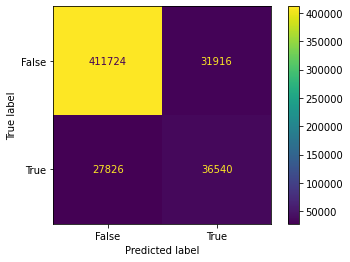

In [35]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import joblib


%cd /content/drive/MyDrive/FYP/Implementation/data
test_high_level_features=pd.read_csv("test_high_level_features.csv", sep=',', on_bad_lines='skip', index_col=False)

test_high_level_features.dropna()

#delete raws with missing values
for i in test_high_level_features.columns.values.tolist():
  i = test_high_level_features.loc[test_high_level_features[i].isnull()].index
  test_high_level_features = test_high_level_features.drop(index=list(i))

x_test = np.array(test_high_level_features.iloc[:,:-1])
y_test = np.array(test_high_level_features['Label'])

%cd /content/drive/MyDrive/FYP/Implementation/models
# # Load the model from the file
logr = joblib.load('best_logr.pkl')

#getting probabilities of class 1
prob=logr.predict_proba(x_test)
prob=prob[:,1]

optimal_threshold = 0
maximum_f1 = 0

for i in range(1,100):
  threshold = i/100
  y_predict_class_train = [1 if p > threshold else 0 for p in prob]

  f1 = f1_score(y_test, y_predict_class_train)
  if maximum_f1 < f1:
    maximum_f1 = f1
    optimal_threshold = threshold
    opt_y_train = y_predict_class_train 

accuracy = accuracy_score(y_test, opt_y_train)
print(f"maximum_test_f1_score: {maximum_f1}, accuracy: {accuracy}, optimal_threshold: {optimal_threshold: .6f}")
confusion_matrix = metrics.confusion_matrix(y_test, opt_y_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()